In [35]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def case_study(names):
    # layout configuration
    num_rows = len(names)
    num_cols = 9
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(55, 6 * num_rows))

    for row, name in enumerate(names):
        # Paths
        real_path1 = f'./dataset/real/160x160/rgb/{name}.jpg'
        real_path2 = f'./dataset/transfer/Cable1_019_0_19/rgb/{name}.jpg'
        true_render_path = f'./dataset/rendering/{name}.jpg'
        true_front_path = f'./dataset/instruction-front/{name}.png'
        true_complete_path = f'./dataset/instruction-complete/{name}.png'
        pred_render_path = f'./checkpoint/RFINet_front_xferln_160k/eval/gen/{name}.png'
        pred_front_path = f'./checkpoint/RFINet_front_xferln_160k/eval/{name}.png'
        pred_complete_frompred_path = f'./checkpoint/xfer_complete_frompred_residual/eval/{name}.png'
        
        if name.split('_')[0] not in ('2j', '3j', '4j'):
            pred_complete_frompred_j_path = f'./checkpoint/xfer_complete_frompred_residual_sj/eval/{name}.png'
            pred_complete_fromtrue_j_path = f'./checkpoint/xfer_complete_fromtrue_residual_sj/eval/{name}.png'
        else:
            pred_complete_frompred_j_path = f'./checkpoint/xfer_complete_frompred_residual_mj/eval/{name}.png'
            pred_complete_fromtrue_j_path = f'./checkpoint/xfer_complete_fromtrue_residual_mj/eval/{name}.png'

        # Load Images
        if os.path.exists(real_path1):
            real_image = Image.open(real_path1)
        else:
            real_image = Image.open(real_path2)
            
        images = [
            real_image,
            Image.open(true_render_path),
            Image.open(true_front_path),
            Image.open(true_complete_path),
            Image.open(pred_render_path),
            Image.open(pred_front_path),
            Image.open(pred_complete_frompred_path),
            Image.open(pred_complete_frompred_j_path),
            Image.open(pred_complete_fromtrue_j_path)
        ]

        titles = [
            "Real", "True Render", "True Front", "True Complete", 
            "Pred Render", "Pred Front", "Pred Complete Frompred", 
            "Pred Complete Frompred j", "Pred Complete Fromtrue j"
        ]

        # Display images for each row
        for col in range(num_cols):
            ax = axes[row, col] if num_rows > 1 else axes[col]
            ax.imshow(images[col])
            ax.axis('off')
            if row == 0:
                ax.set_title(titles[col], fontsize=18)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.02, hspace=0.1)
    plt.show()


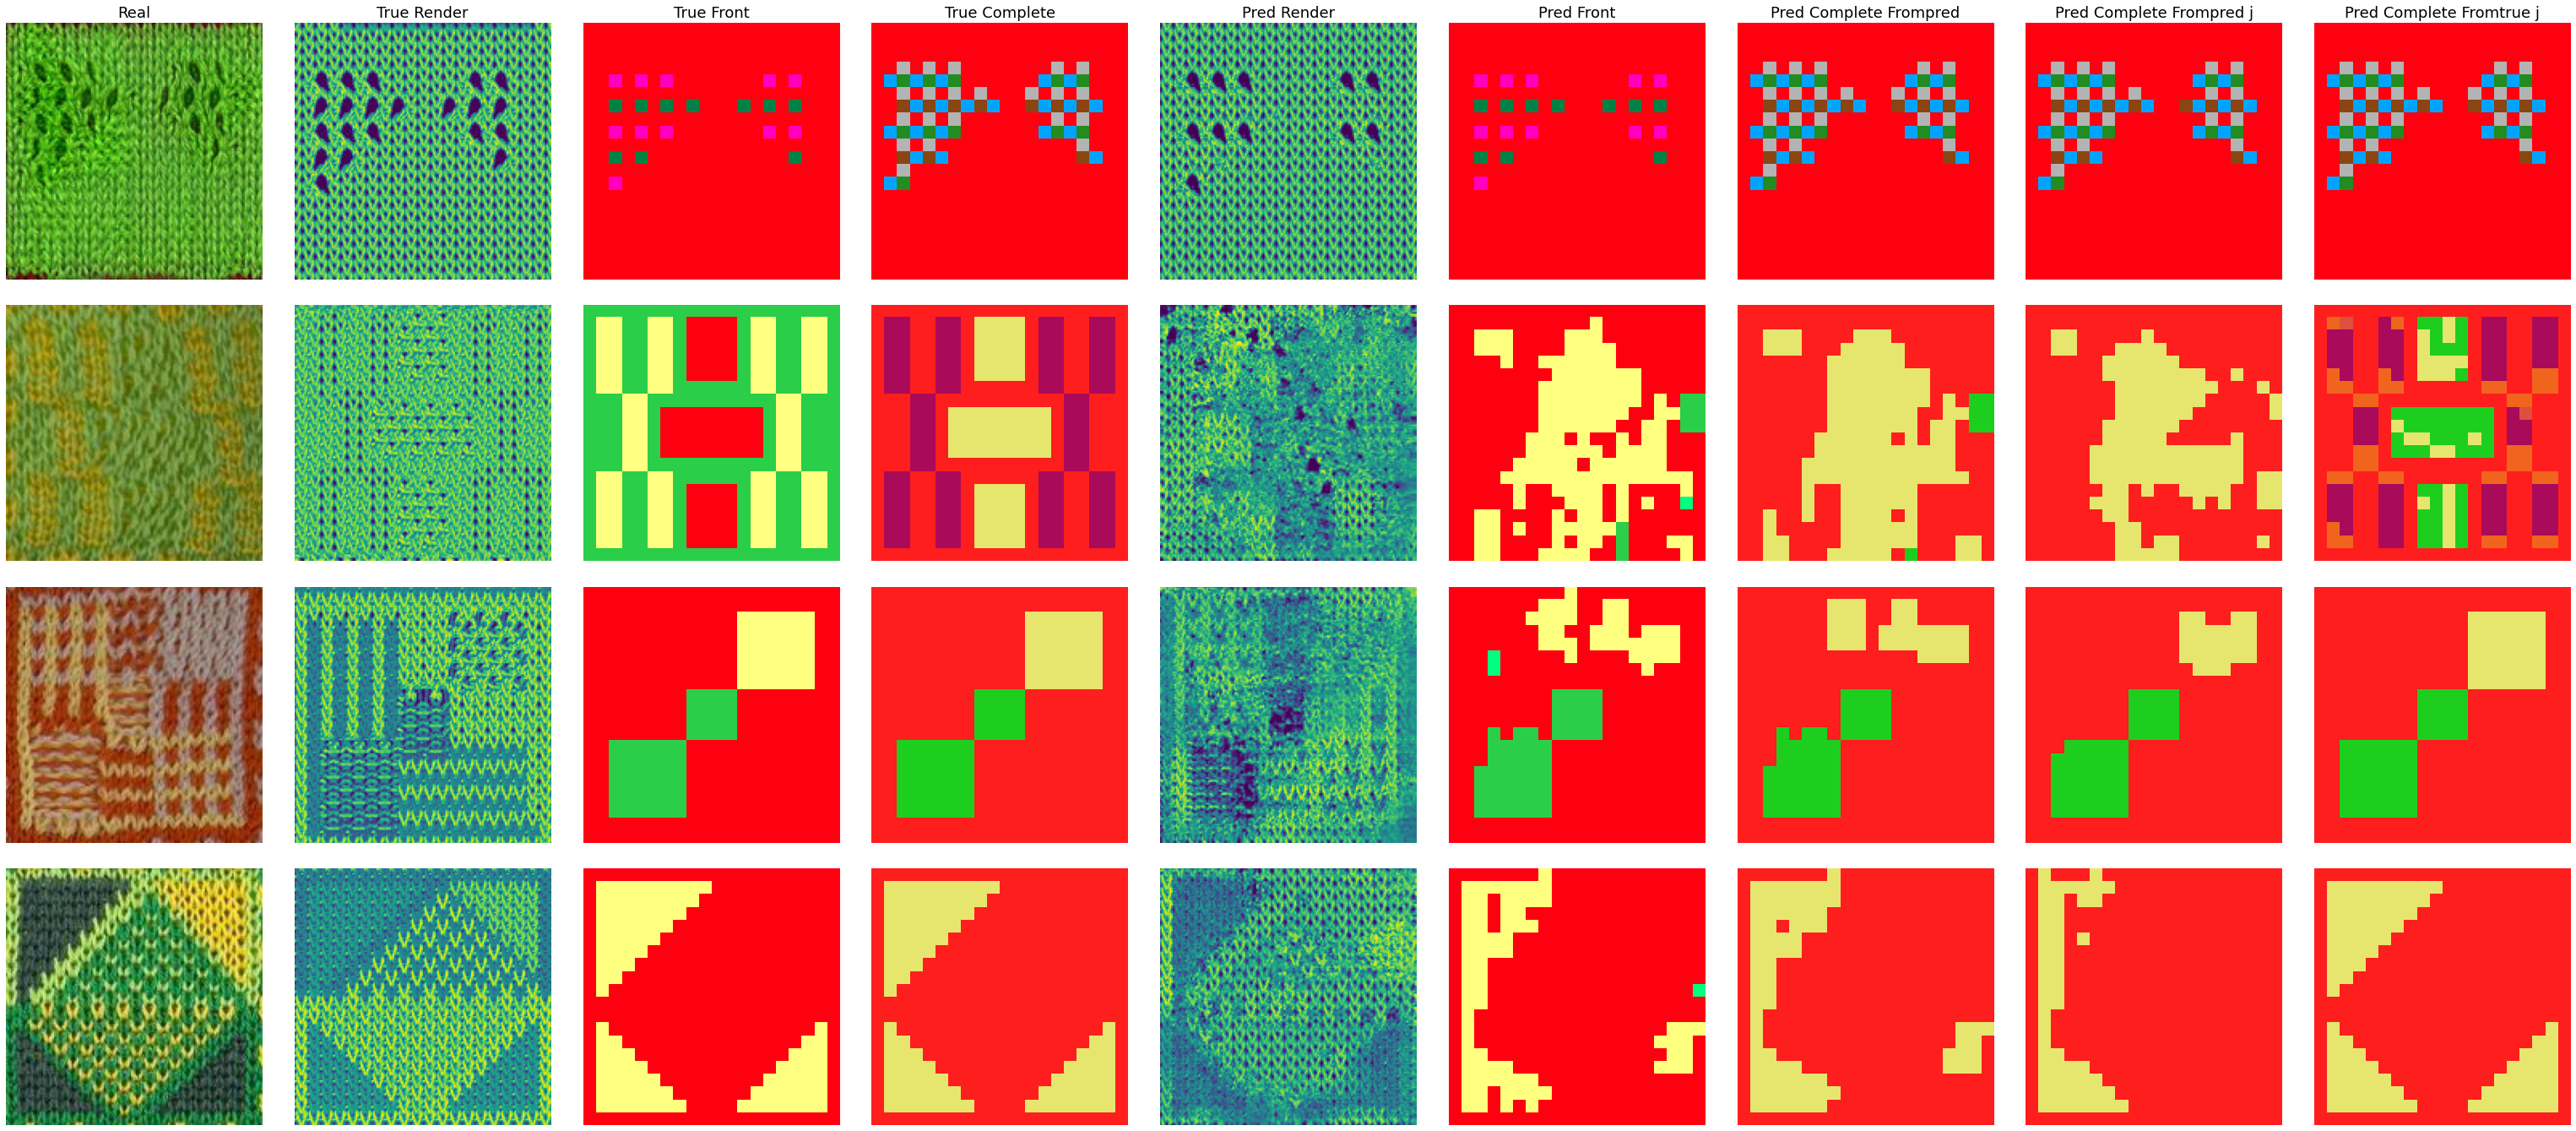

In [37]:
case_study(['Hem_044_34_73', '2j_wool-3.5.2-4-47-21','3j_rayon-7.2-4-30-1','4j_wool-3.5.2-4-16-13'])